<a href="https://colab.research.google.com/github/marcio-lfo/devai/blob/main/Francisco_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

In [1]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
data = pd.read_csv('/content/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Verificando os tipos de dados
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Retiramos a coluna que queremos predizer

y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
# Não vamos utilizar o data inteirno vamos retirar a coluna 'survived'

X = data.drop('Survived', axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Vendo quantos elementos repetidos existem nas colunas

for column in X.columns:
  print(f"{column:>12} {len(set(X[column])):4} {X[column].dtypes}")

 PassengerId  891 int64
      Pclass    3 int64
        Name  891 object
         Sex    2 object
         Age  265 float64
       SibSp    7 int64
       Parch    7 int64
      Ticket  681 object
        Fare  248 float64
       Cabin  148 object
    Embarked    4 object


Observa-se que existem várias idades
Quando a quantidade de característica é maior do que um terço da quantidade de exemplo a gente começa a perder um pouco
Para simplificação de exemplo do tutorial iremos eliminar algumas das características iremos trabalhar com outras

In [7]:
# Retirando características indesejadas

indesejadas = ['PassengerId','Name','Ticket','Cabin']
Xdrop = X.drop(indesejadas, axis=1)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [8]:
# Levantando as características numéricas

Xnum = Xdrop.select_dtypes('number')
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
# Levantando as características nulas

for column in Xnum.columns:
   print(f"{column:>12} {sum(Xnum[column].isnull())}")

      Pclass 0
         Age 177
       SibSp 0
       Parch 0
        Fare 0


Observa-se que existem 177 idades nulas

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
XnumLimpo = imputer.fit_transform(Xnum)
XnumLimpo

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

A estratégia padrão é a média estamos usando a mediana

imputer.fit_tranform - Pega uma entrada de dados qualquer e transforma em uma que é aceita no caso vai pegar a idade que é vazia e vai colocar a mediana

In [11]:
# Tratamento dos atributos categóricos

Xcat = Xdrop.select_dtypes('object')
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [12]:
for column in Xcat.columns:
   print(f"{column:>12} {sum(Xcat[column].isnull())}")

         Sex 0
    Embarked 2


Precisamos tratar os dois casos do Embarked para o algoritimo não parar

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
XcatLimpo = imputer.fit_transform(Xcat)
XcatLimpo

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

Outro problema, a maior parte dos classificadores que for tentar treinar eles não vão aceitar diretamente essas características categóricas.
Precisamos transformar as categorias para numéricas.
Vamos utilizar o ordinal encoder que vai colocar um número para cada situação aqui na sequência.

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
XcatHot = encoder.fit_transform(XcatLimpo)
XcatHot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [15]:
import numpy as np
Xtratado = np.c_[XnumLimpo, XcatHot.toarray()]
Xtratado.shape

(891, 10)

In [16]:
Xtratado

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [17]:
import pandas as pd

# Verificando o que está no treino e está no teste ao mesmo tempo

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.columns.isin(test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Observa-se que a segunda coluna não consta nas duas bases de dados

In [18]:
# Verificando qual é a coluna que tem no treino e não tem no teste

train.columns[~train.columns.isin(test.columns)]

Index(['Survived'], dtype='object')

In [19]:
# Começando um pipeline
# Começar a organizar o dataset de forma que quando chegar um dado novo cru ele vai treinar tudo de novo

from sklearn.base import BaseEstimator, TransformerMixin

# Criando uma classe para tratar os dados da base
class AtributosDesejados(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasIndesejadas_ = ['PassengerId','Name','Ticket','Cabin']
    return self

  def transform(self, X, y=None):
    return X.drop(self.colunasIndesejadas_, axis=1)

atributosDesejados = AtributosDesejados()
Xdrop = atributosDesejados.fit_transform(X)
Xdrop.columns


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

Observe que usamos o fit_transform mas não foi implementado. O TransformerMixin já possui implementado, se tiver o transform implementado ele chama o sequência do outro.

In [20]:
# Vamos separar o que é categórico de numérico

from sklearn.base import BaseEstimator, TransformerMixin

class AtributosNumericos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasNumericas_ = X.select_dtypes('number').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasNumericas_]

atributosNumericos = AtributosNumericos()
XNum = atributosNumericos.fit_transform(Xdrop)
XNum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipenum = Pipeline([
        ('atributos_numericos', AtributosNumericos()),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

XnumLimpo = pipenum.fit_transform(Xdrop)
XnumLimpo

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

Agora ele já pega direto do drop e passa para o limpo não passa pelo xnum que faz lá dentro

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosCategoricos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasCategoricas = X.select_dtypes(include='object').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasCategoricas]

atributosCategoricos = AtributosCategoricos()
Xcat = atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [23]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

pipecat = Pipeline([
        ('atributos_categoricos', AtributosCategoricos()),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder())
    ])

XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

Temos dois datasets separados, um dos categórico e outro dos numérico.
Temos que junta isso tudo de novo para mandar uma matriz só para o treinar o classificador

In [24]:
# Consegue colocar os dois pipelines funcionando como um se fosse um só
from sklearn.pipeline import FeatureUnion

unecaracteristicas = FeatureUnion([
        ('pipenum', pipenum),
        ('pipecat', pipecat),
])

Xtratado = unecaracteristicas.fit_transform(Xdrop)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
# Gerando um pipeline de todo o processamento, desde unir as características até unir as características de novo
# De forma que mandasse os dados crus e ele entregasse os dados tratados

from sklearn.pipeline import Pipeline

preproc = Pipeline([
        ('atributos_desejados', AtributosDesejados()),
        ('unecaracteristicas', unecaracteristicas)
])

Xtratado = preproc.fit_transform(X)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

Até o momento só conseguimos tratar, não conseguimos classificar.
Vamos gerar um pipeline total que vai ser capaz de pegar o dado cru e entregar uma resposta.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipetotal = Pipeline([
        ('preproc', preproc),
        ('arvore', DecisionTreeClassifier())
])

pipetotal.fit(X,y)
ypred = pipetotal.predict(X)
accuracy = accuracy_score(y, ypred)

print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.98


O resultado deu muito alto mais isso é uma resubstituição. Se a gente quiser verificar realmente se isso está trazendo um resultado interessante teremos que rodar uma validação cruzada.
Só vamos mandar para o teste quando souber que está legal no treinamento.
Se eu fico treinando, ajustando as coisas e testando eu vou gerar um overfitting no teste, coisas novas que chegarem não saberemos se vai ser bom ou não.

In [27]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.02813196, 0.01905107, 0.02384377, 0.01751256, 0.01782179]),
  'score_time': array([0.00849128, 0.01012278, 0.00803351, 0.00788426, 0.00795698]),
  'test_score': array([0.76536313, 0.7752809 , 0.81460674, 0.74157303, 0.82022472])},
 0.7834097043500095)

Como melhorar o resultado?
Podemos tentar ajustar as características ou o classificador. Se tentar ajustar olhando para o teste o tempo todo, vai dar problema.
Vamos gerar um exemplo de como obter esses parâmetros de forma automática.

In [28]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [None] + list(range(1,10,2))       #  variando de 1 até 10 de 2 em 2
}

modelo = GridSearchCV(pipetotal, param_grid=parametros)
scores = cross_validate(modelo , X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.80252934, 1.15021753, 1.15409255, 0.84197736, 0.8019104 ]),
  'score_time': array([0.01250529, 0.02507162, 0.0107615 , 0.00742602, 0.0076375 ]),
  'test_score': array([0.81564246, 0.81460674, 0.81460674, 0.78089888, 0.85393258])},
 0.8159374803841567)

Fez uma validação cruzada, aninhada para cada um dos parâmetros.

Melhorou bastante de **0.78** foi para **0.81**.

In [29]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [None, 1, 3, 5, 7, 9],
    'preproc__unecaracteristicas__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent']
}

modelo = GridSearchCV(pipetotal, param_grid=parametros)
scores = cross_validate(modelo , X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([3.0885303 , 2.33492613, 2.37349176, 2.33825564, 2.6645205 ]),
  'score_time': array([0.00791144, 0.00709963, 0.00728488, 0.00749207, 0.01060057]),
  'test_score': array([0.81564246, 0.81460674, 0.81460674, 0.78089888, 0.8258427 ])},
 0.8103195028560668)

In [30]:
modelo.fit(X,y)
modelo.best_estimator_

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('atributos_desejados', AtributosDesejados()),
                                 ('unecaracteristicas',
                                  FeatureUnion(transformer_list=[('pipenum',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosNumericos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('scaler',
                                                                                   StandardScaler())])),
                                                                 ('pipecat',
                                                                  Pipeline(steps=[('atributos_categoricos',
                                                                                   AtributosCategoricos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder())]))]))])),
                ('arvore', DecisionTreeClassifier(max_depth=5))])

Conseguimos ver toda a sequência do nosso modelo e o que ele escolheu.
Ele escolheu o **max_depth = 5**.

No SimpleImputer a estratégia que ele escolheu foi o '**most_frequent**'.


In [31]:
# Utilizando o classificador RandomForestClassifier

from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score

pipetotal = Pipeline([
        ('preproc', preproc),
        ('randomforest', RandomForestClassifier())
])

pipetotal.fit(X,y)
ypred = pipetotal.predict(X)
accuracy = accuracy_score(y, ypred)

print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.98


In [32]:
pipetotal.fit(X,y)
ypred = pipetotal.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('randomforest_submission.csv', index=False)

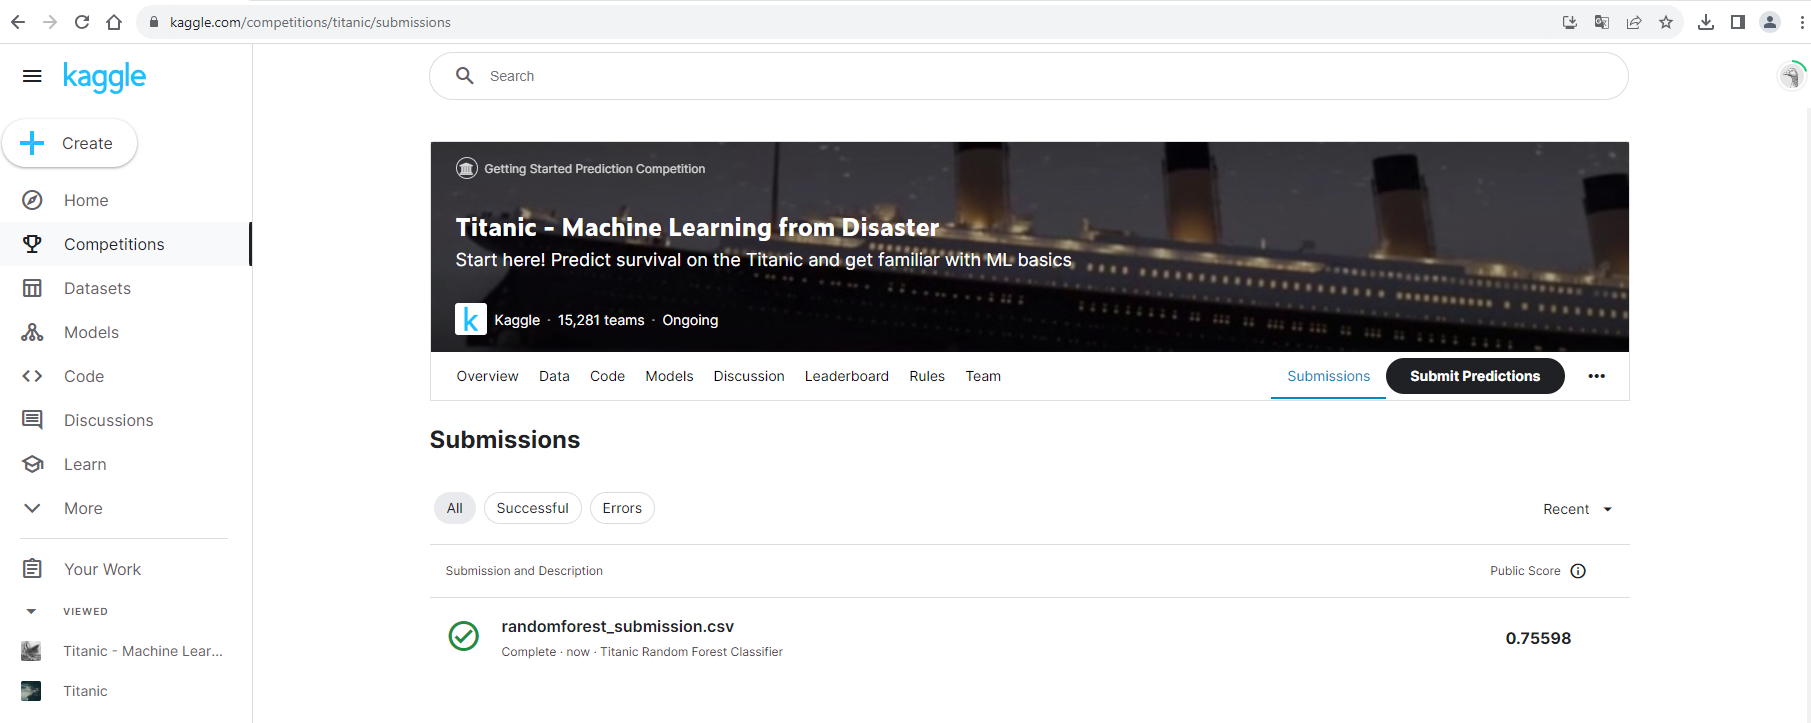